# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

In the project of segmenting Netflix Movies and TV-shows, the main goal was to perform unsupervised machine learning for clustering. Here's a summary of the key steps and decisions made during the project:

Data Understanding: The project began with importing the dataset and gaining a basic understanding of its contents. This involved inspecting the dataset's structure, data types, and basic statistics.

Data Wrangling: Data preprocessing was planned and executed. The date feature was converted to a pandas datetime object for easier manipulation. Missing values were not handled extensively, as they were limited and did not significantly impact the analysis. The decision was made to utilize the text-based "Description" feature for machine learning.

Text Preprocessing: Text data preprocessing was performed on the "Description" feature. This included converting text to lowercase, removing punctuation, stopping words, and extra white spaces. These steps prepared the text for vectorization.

Text Vectorization: The TfidfVectorizer was used to convert the preprocessed text data into numerical vectors. A maximum of 400 features were chosen to represent each review observation, providing a 400-length feature vector for each.

Clustering Models: Three different clustering models were experimented with:

K-means: This is a traditional clustering algorithm that partitions the data into K clusters based on similarity. It was one of the first methods tried.
Hierarchical Clustering: Hierarchical clustering arranges data points into a hierarchy of clusters. This approach was explored to understand potential hierarchical relationships in the data.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN is a density-based clustering algorithm that can identify clusters of varying shapes and sizes. It was chosen as another clustering method to compare with K-means and hierarchical clustering.
The project aimed to identify meaningful clusters within the Netflix Movies and TV-shows dataset based on the content descriptions. The choice of clustering algorithms allowed for different perspectives on how the data could be grouped.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The dataset under consideration contains information about TV shows and movies available on Netflix as of 2019. This dataset was collected from Flixable, a third-party Netflix search engine. In recent years, Netflix has witnessed significant changes in its content library. In 2018, it was reported that the number of TV shows on Netflix had almost tripled since 2010, while the number of movies had decreased significantly.

The goal of this project is to perform a comprehensive analysis of the Netflix dataset to extract valuable insights and trends. This analysis aims to answer questions and uncover patterns such as:

Content Trends: Explore how the quantity of TV shows and movies has evolved over the years. Are there noticeable shifts in the content mix, and what might be the reasons behind these changes?

Content Duration: Analyze the distribution of content duration (runtime) for both TV shows and movies. Are there any trends in the length of content?

Content Ratings: Investigate the distribution of content ratings (e.g., PG, TV-MA) to understand the diversity of content available on Netflix.

Release Year Analysis: Examine the distribution of content release years. Are there patterns in the years when content was added to Netflix?

Country of Production: Explore the countries where content is produced. Which countries contribute the most content to Netflix?

Content Analysis: Perform a textual analysis of the descriptions to identify common themes or keywords in the content. Are there recurring topics in the descriptions?

Integration with External Data: Investigate the possibility of integrating this dataset with external sources, such as IMDb ratings or Rotten Tomatoes scores, to enrich the analysis and gain a deeper understanding of content quality and popularity.

The insights derived from this analysis can be valuable for both Netflix and its viewers. Netflix can use these insights to make informed decisions about content acquisition and production. Additionally, viewers can benefit from a better understanding of the content available on the platform, helping them discover shows and movies that align with their preferences.

This project offers an opportunity to explore trends in the rapidly evolving world of streaming content and provides a foundation for more advanced analyses and machine learning applications in the future.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
from sklearn.compose import make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
# avoid warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)


# text preprocessing libraries

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.CSV")

### Dataset First View

In [3]:
# Dataset First Look
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7070,s7071,Movie,Thug Life,Mukesh Vohra,"Harish Verma, Jass Bajwa, Rajiv Thakur, Ihana ...",India,"December 1, 2019",2017,TV-14,133 min,"Comedies, Dramas, International Movies",A get-rich-quick scheme goes awry when a group...
2042,s2043,Movie,Evening Shadows,Sridhar Rangayan,"Mona Ambegaonkar, Anant Mahadevan, Devansh Dos...",India,"February 27, 2019",2018,TV-PG,102 min,"Dramas, Independent Movies, International Movies","When her son comes out to her as gay, a religi..."
5607,s5608,Movie,Silicon Cowboys,Jason Cohen,NaN,United States,"April 1, 2017",2016,TV-PG,77 min,Documentaries,This documentary tells the story of Compaq Com...
2833,s2834,Movie,House of the Witch,Alex Merkin,"Emily Bader, Darren Mann, Michelle Randolph, C...",United States,"October 11, 2020",2017,TV-MA,86 min,Horror Movies,A group of daring teens finds themselves in a ...
890,s891,Movie,Bheeshma,Venky Kudumula,"Nitin Reddy, Rashmika Mandanna, Sampath Raj, J...",India,"April 25, 2020",2020,TV-14,138 min,"Action & Adventure, Comedies, International Mo...","Tired of being single, a smart-aleck meme crea..."


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing value in the dataset')

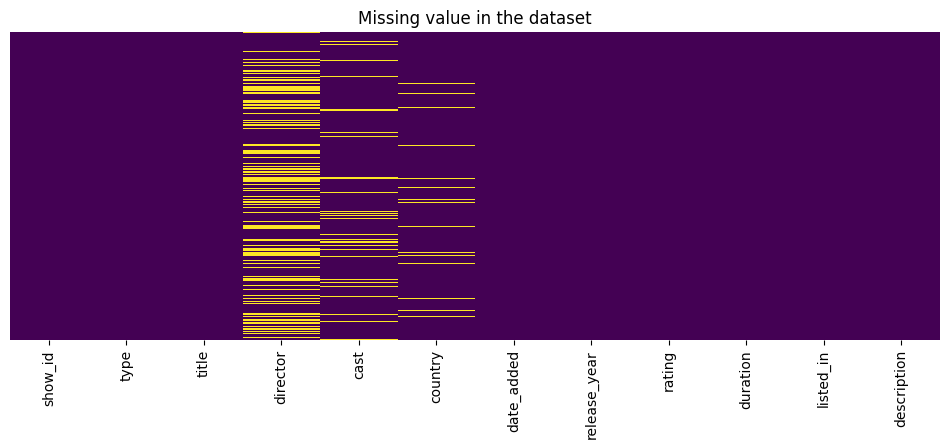

In [8]:
# Visualizing the missing values
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cbar=False,
            cmap='viridis', yticklabels=False)
plt.title('Missing value in the dataset')

### What did you know about your dataset?

This is an unsupervised machine learning project that focuses on the segmentation of Netflix movies and TV shows based on various features and characteristics. The dataset used for this project contains information about movies and TV shows available on Netflix, including details such as title, director, cast, country, genre, release year, rating, duration, and a description.

* Data Cleaning:

The initial dataset contained some duplicated observations, which were removed to ensure data quality. Additionally, there are four features (director, cast, country, date_added) with missing values (NaN). These missing values were handled during the data preprocessing stage.

* Data Preprocessing:

Missing Values: The missing values in the 'director,' 'cast,' 'country,' and 'date_added' columns were addressed. Depending on the specific column, missing values were either filled with appropriate values or dropped if they couldn't be reasonably imputed.
Feature Engineering:

Text Data: The 'description' feature, which contains textual information about the content, was processed to prepare it for analysis. This included lowercasing, punctuation removal, and handling of stopwords.

* Exploratory Data Analysis (EDA):

Basic statistics and visualizations were used to gain insights into the dataset. This included examining the distribution of content types (movies vs. TV shows), exploring the distribution of ratings and genres, and understanding the content's release patterns.

* Unsupervised Learning - Clustering:

The primary focus of this project is to segment the Netflix content into clusters based on its attributes. Various clustering algorithms, such as K-means, Hierarchical Clustering, and DBSCAN, were applied to group similar content together. The goal is to discover meaningful patterns or groupings within the dataset.

* Next Steps:

After clustering, the clusters can be analyzed to understand what characteristics define each group of content. Insights from this unsupervised analysis can be used to recommend content to users, personalize user experiences, or aid in content recommendation systems. Further analysis and visualization can provide valuable insights into Netflix's content library and its audience's preferences.

* Challenges:

Dealing with missing data in features like 'director' and 'cast.'

Text preprocessing and feature engineering for the 'description' column.

Choosing the appropriate number of clusters for clustering algorithms.

Interpretation and visualization of the clusters to derive actionable insights for content recommendation and catalog management.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

show_id: A unique identifier for each observation, not highly useful.

type: Describes whether the entry is a TV series or a movie.

title: The title of the movie or TV show.

director: The name of the director for the content.

cast: Information about the cast members.

country: The country of origin for the content.

date_added: The date the content was added to Netflix.

release_year: The year when the content was originally released.

rating: The TV rating of the show.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
    print("unique values in", i, "is", df[i].nunique(), ".")

unique values in show_id is 7787 .
unique values in type is 2 .
unique values in title is 7787 .
unique values in director is 4049 .
unique values in cast is 6831 .
unique values in country is 681 .
unique values in date_added is 1565 .
unique values in release_year is 73 .
unique values in rating is 14 .
unique values in duration is 216 .
unique values in listed_in is 492 .
unique values in description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Import necessary libraries
import pandas as pd
import numpy as np

# Function to handle the 'date_added' feature


def handle_date_added(date_added_values):
    fin_date = []
    for date in date_added_values:
        if pd.isna(date):
            fin_date.append(np.nan)
        else:
            # Extracting day
            day = date.split()[1]
            day = int(day[:-1])

            # Extracting month
            month = date.split()[0]
            month_map = {
                'January': 1, 'February': 2, 'March': 3, 'April': 4,
                'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9,
                'October': 10, 'November': 11, 'December': 12
            }
            month = month_map[month]

            # Extracting year
            year = date.split()[-1]
            # Ensures leading zeros for month and day
            fin_date.append(f'{year}-{month:02d}-{day:02d}')

    # Returning as datetime
    return pd.to_datetime(fin_date)

In [13]:
df['date_added'] = handle_date_added(df.date_added)

In [14]:
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [15]:
# hindling the missing values
df[['director', 'cast', 'country']] = df[[
    'director', 'cast', 'country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace=True)

In [16]:
df['cast'] = df['cast'].apply(lambda x: np.nan if pd.isna(x) else x.split(','))

In [17]:
df['country'].value_counts()

country
United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 682, dtype: int64

In [18]:
df.listed_in.value_counts()

listed_in
Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: count, Length: 491, dtype: 

The additional insight provided indicates that the 'country' column contains entries where some movies or TV shows were filmed in multiple countries. Similarly, the 'listed_in' column includes multiple genres associated with some entries. To simplify the analysis and make it more manageable, the following actions were taken:

Primary Country Selection: For movies or TV shows that were filmed in multiple countries, only the primary country where the respective content was filmed was considered. This means that if a movie or TV show was filmed in several countries, only one of those countries (likely the primary filming location) was retained for analysis.

Primary Genre Selection: Similarly, for entries with multiple genres associated with them, only the primary genre was considered for analysis. This simplifies the genre classification by focusing on the primary genre that best represents the content.

In [19]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [20]:
# country in which a movie was producted
df.country.value_counts()

country
United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: count, Length: 82, dtype: int64

In [21]:
# genre of shows
df.listed_in.value_counts()

listed_in
Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals            

Typecasting 'duration from string to integer

In [22]:
# Splitting the duration column and chaging the datatype to integer values
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [23]:
# Number of seasons for tv shows
df[df['type'] == 'TV Show'].duration.value_counts()

duration
1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: count, dtype: int64

In [24]:
# Movie length in minutes
df[df['type'] == 'Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [25]:
# datatype of duration
df.duration.dtype

dtype('int64')

We have successfully converted the datatype of duration column to int.

In [26]:
df

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,Unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0
4,s5,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...",Sweden,2005,TV-MA,99,Dramas,When Lebanon's Civil War deprives Zozo of his ...,10.0,2020.0
7783,s7784,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",India,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,3.0,2019.0
7784,s7785,Movie,Zulu Man in Japan,Unknown,[Nasty C],Unknown,2019,TV-MA,44,Documentaries,"In this documentary, South African rapper Nast...",9.0,2020.0
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"[Adriano Zumbo, Rachel Khoo]",Australia,2019,TV-PG,1,International TV Shows,Dessert wizard Adriano Zumbo looks for the nex...,10.0,2020.0


In [27]:
df['cast'][0]

['João Miguel',
 ' Bianca Comparato',
 ' Michel Gomes',
 ' Rodolfo Valente',
 ' Vaneza Oliveira',
 ' Rafael Lozano',
 ' Viviane Porto',
 ' Mel Fronckowiak',
 ' Sergio Mamberti',
 ' Zezé Motta',
 ' Celso Frateschi']

In [28]:
# Convert lists in the 'cast' column to strings
df['cast'] = df['cast'].apply(
    lambda x: ', '.join(x) if isinstance(x, list) else x)

Rating -> The rating can be change to age restriction that apply on certain movie and tv showa

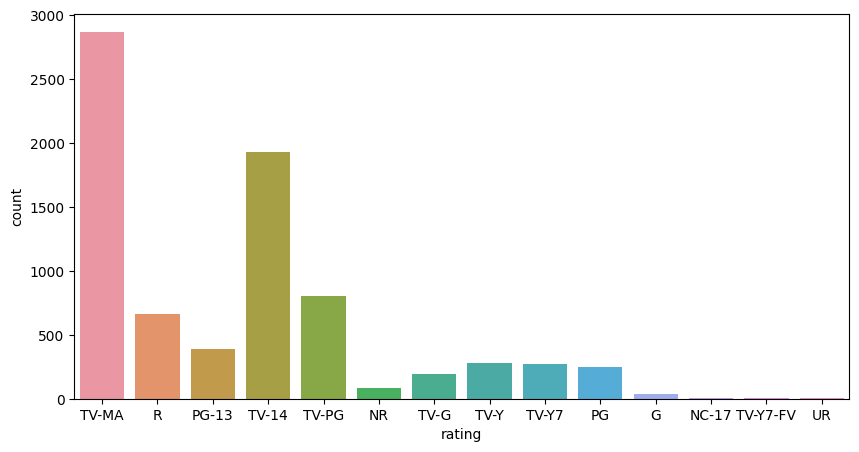

In [29]:
# Age rating for shows in the dataset.
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=df)
plt.show()

In [30]:
rating_map = {'TV-MA': 'Adults',
              'R': 'Adults',
              'NR': 'Adults',
              'NC-17': 'Adults',
              'UR': 'Adults',
              'TV-14': ' Young Adults',
              'PG-13': 'Teens',
              'TV-PG': 'Older Kids',
              'TV-Y7': 'Older Kids',
              'TV-Y7-FV': 'Older Kids',
              'TV-G': 'Kids',
              'TV-Y': 'Kids',
              'G': 'Kids', }

df['rating'].replace(rating_map, inplace=True)

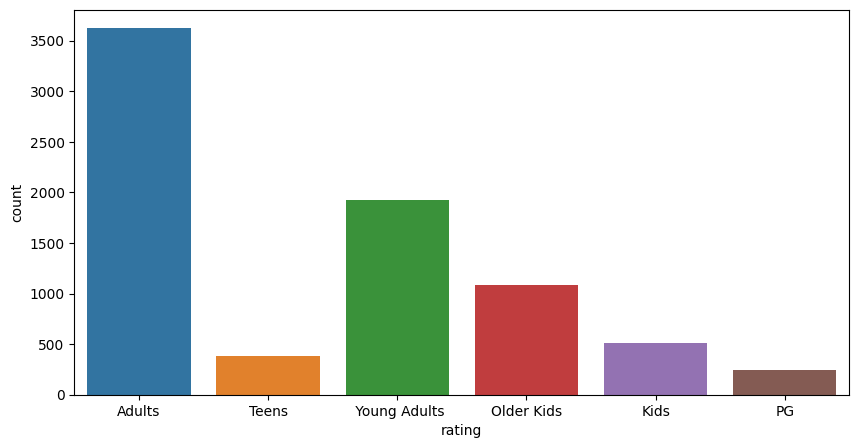

In [31]:
# Age rating for shows in the dataset.
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=df)
plt.show()

### What all manipulations have you done and insights you found?

Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [32]:
# Chart - 1 visualization code
import plotly.express as px

# Create a DataFrame with the count of each 'type'
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Create a pie chart
fig = px.pie(type_counts, values='Count', names='Type',
             title='Movies and TV Shows in the dataset')

# Show the chart
fig.show()

##### 1. Why did you pick the specific chart?

Categorical Data Representation: Pie charts are excellent for representing categorical data, where we want to show how parts of a whole contribute to the whole. In this case, you have two categories: "Movies" and "TV Shows," and we want to see how they are distributed.

##### 2. What is/are the insight(s) found from the chart?

The insight found from the pie chart is that:

* Approximately 30.9% of the content in the dataset consists of TV shows.
* Approximately 69.1% of the content in the dataset consists of movies.

This indicates that movies make up the majority of the content on Netflix in the dataset, while TV shows represent a smaller but still significant portion.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights about the distribution of movies and TV shows can positively impact content decisions but need to be complemented with more data for a complete view. They won't directly lead to negative growth, but decisions should consider various factors to avoid missing opportunities.

#### Chart - 2

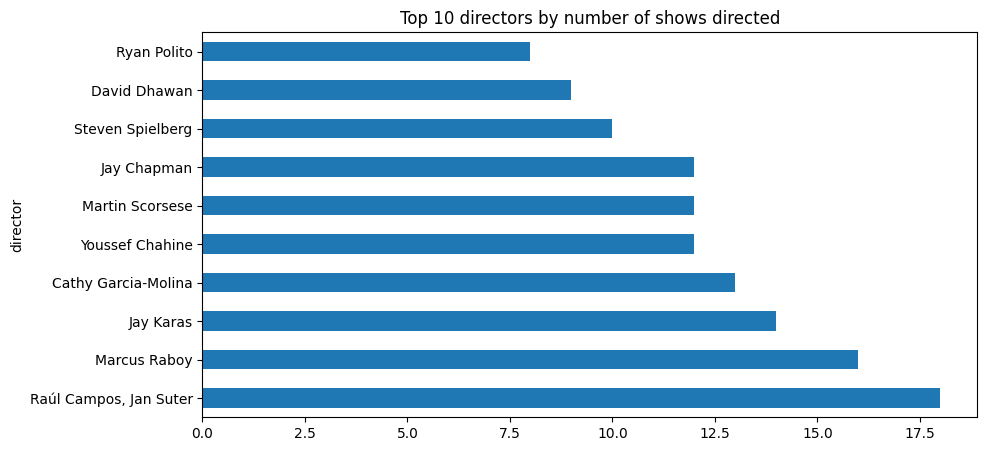

In [33]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10, 5))
df[~(df['director'] == 'Unknown')].director.value_counts().nlargest(
    10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart for displaying the top 10 directors by the number of shows directed because it's an effective way to visualize and compare the directors' contribution to the dataset. The horizontal orientation allows for easy readability of director names, and the length of the bars directly represents the number of shows directed,

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter together have directed 18 movies and TV shows, higher than anyone in this dataset

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

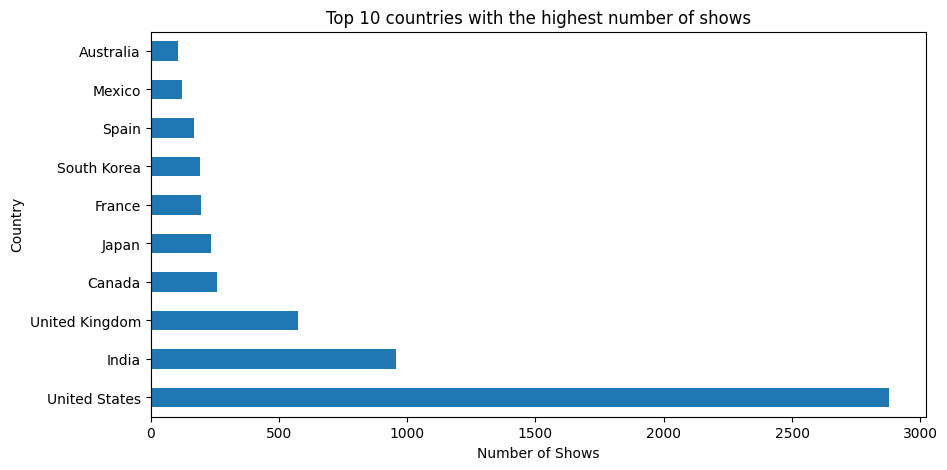

In [34]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 5))
df[~(df['country'] == 'Unknown')]['country'].value_counts().nlargest(
    10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

Insightful: It provides a quick overview of which countries are the primary producers of content on Netflix, which can be valuable for understanding the distribution of content across regions.

Comparison: A horizontal bar chart is effective for comparing the number of shows among different countries. It allows for a clear visual comparison of the top 10 countries, making it easy to identify which countries have the most content.

##### 2. What is/are the insight(s) found from the chart?

The highest number of movies and TV shows were based out of the US, followed By India and UK

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

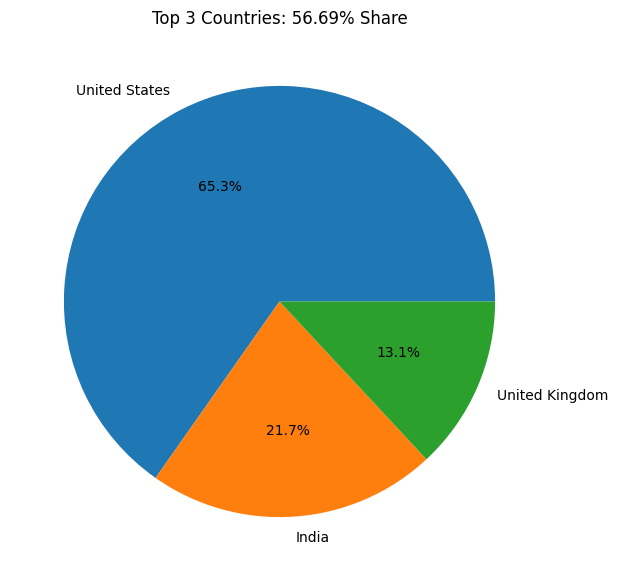

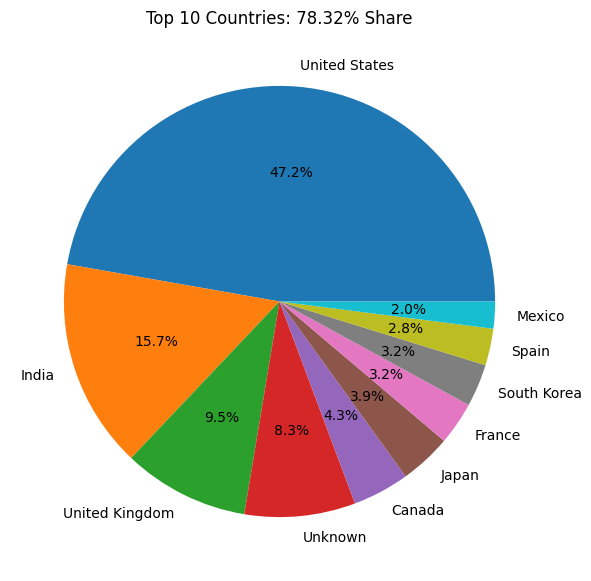

In [35]:
# Chart - 4 visualization code
# % share of movies/TV shows by the top 3 countries
top_3_countries = df.country.value_counts().nlargest(3)
total_shows = len(df)
percentage_share_3 = (top_3_countries.sum() / total_shows) * 100

# Pie chart for the top 3 countries
plt.figure(figsize=(7, 7))
plt.pie(top_3_countries, labels=top_3_countries.index, autopct='%1.1f%%')
plt.title(f'Top 3 Countries: {percentage_share_3:.2f}% Share')
plt.show()

# % share of movies/TV shows by the top 10 countries
top_10_countries = df.country.value_counts().nlargest(10)
percentage_share_10 = (top_10_countries.sum() / total_shows) * 100

# Pie chart for the top 10 countries
plt.figure(figsize=(7, 7))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%')
plt.title(f'Top 10 Countries: {percentage_share_10:.2f}% Share')
plt.show()

##### 1. Why did you pick the specific chart?

Clear Comparison: Pie charts are effective for showing the proportion or distribution of categories in a dataset. In this case, they help in comparing the percentage share of shows produced by different countries.

##### 2. What is/are the insight(s) found from the chart?

The top 3 countries together account for about 56% of all movies and TV shows in the dataset.

This value increases to about 78% for top ten countries.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

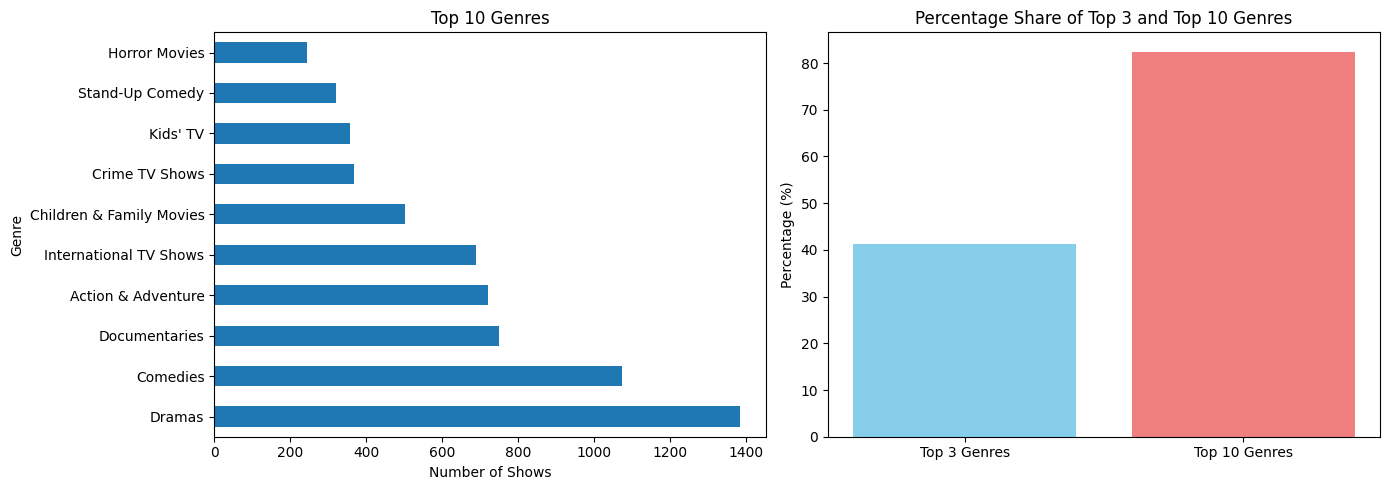

In [36]:
# Chart - 5 visualization code
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Top 10 genres
df.listed_in.value_counts().nlargest(10).plot(kind='barh', ax=axs[0])
axs[0].set_title('Top 10 Genres')
axs[0].set_xlabel('Number of Shows')
axs[0].set_ylabel('Genre')

# Calculate the share of top 3 and top 10 genres
top3_share = df.listed_in.value_counts().nlargest(3).sum() / len(df) * 100
top10_share = df.listed_in.value_counts().nlargest(10).sum() / len(df) * 100

# Plot 2: Percentage Share of Top 3 and Top 10 Genres
shares = [top3_share, top10_share]
categories = ['Top 3 Genres', 'Top 10 Genres']
axs[1].bar(categories, shares, color=['skyblue', 'lightcoral'])
axs[1].set_ylabel('Percentage (%)')
axs[1].set_title('Percentage Share of Top 3 and Top 10 Genres')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

##### 1. Why did you pick the specific chart?


I chose horizontal bar charts because they are effective for comparing and visualizing both the "Top 10 Genres" and the "Percentage Share of Top 3 and Top 10 Genres." They provide clear labels and an intuitive way to understand the data.

##### 2. What is/are the insight(s) found from the chart?

The plot provides insight that the most popular genre on Netflix is "Dramas," followed by "Comedies" and "Documentaries." These three genres collectively make up approximately 41% of all movies and TV shows on Netflix. When considering the top 10 genres, their combined share increases to about 82% of the content available on the platform. This suggests that viewers have a preference for these genres, making them a significant portion of Netflix's content library.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

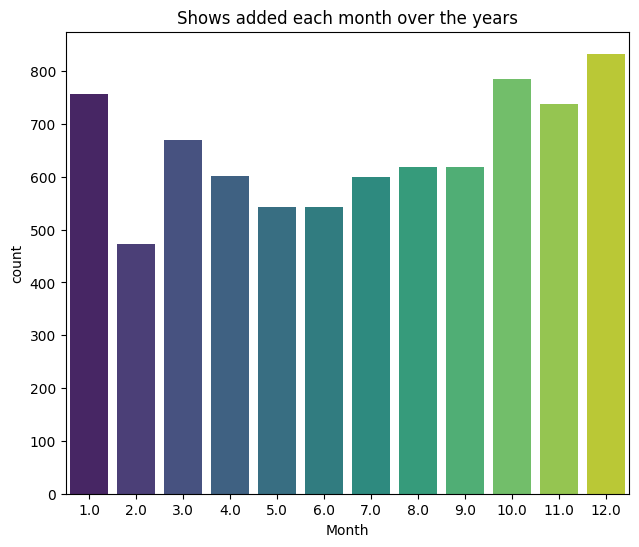

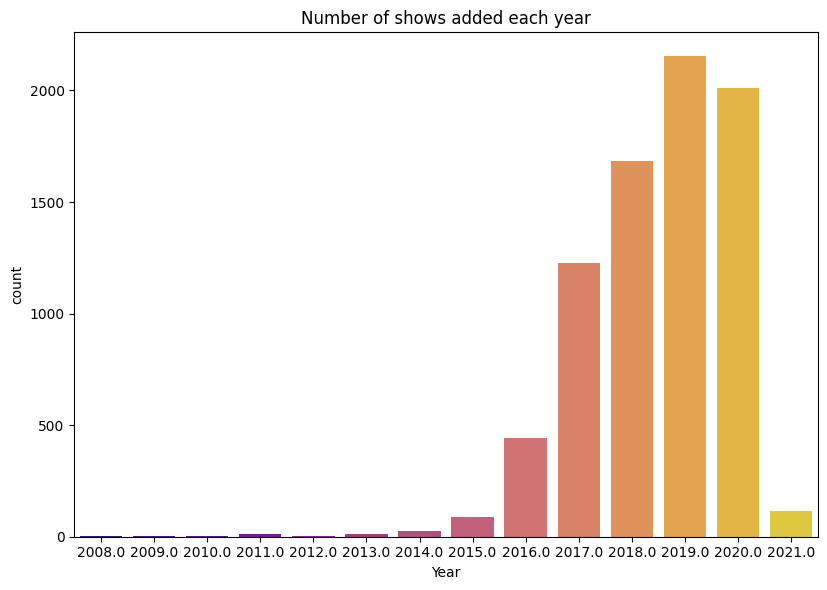

In [56]:
# Chart - 6 visualization code
# Subplot 1: Number of shows added on different months
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='month_added', palette='viridis')
plt.title('Shows added each month over the years')
plt.xlabel('Month')

# Subplot 2: Number of shows added over the years
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='year_added', palette='plasma')
plt.title('Number of shows added each year')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This code will create two subplots side by side, one showing the number of shows added on different months and the other showing the number of shows added over the years. It provides a comprehensive view of the distribution of show additions over time.

##### 2. What is/are the insight(s) found from the chart?

Seasonal Trends: It shows that there's a pattern of increased show additions during the months of October, November, December, and January. This could be attributed to holiday seasons and colder weather when people tend to watch more content.

Continuous Growth: Over the years, there's a consistent growth in the number of shows added to Netflix. This indicates the platform's commitment to expanding its content library.

Covid-19 Impact: The dip in the number of shows added in 2020 is a noteworthy observation. This is likely due to the global COVID-19 pandemic, which disrupted the production and release schedules of many TV shows and movies.

Data Limitation: The reduced number of shows in the year 2021 is explained by the dataset's cutoff date. Since the data only goes up to January 16, 2021, it doesn't capture the full year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

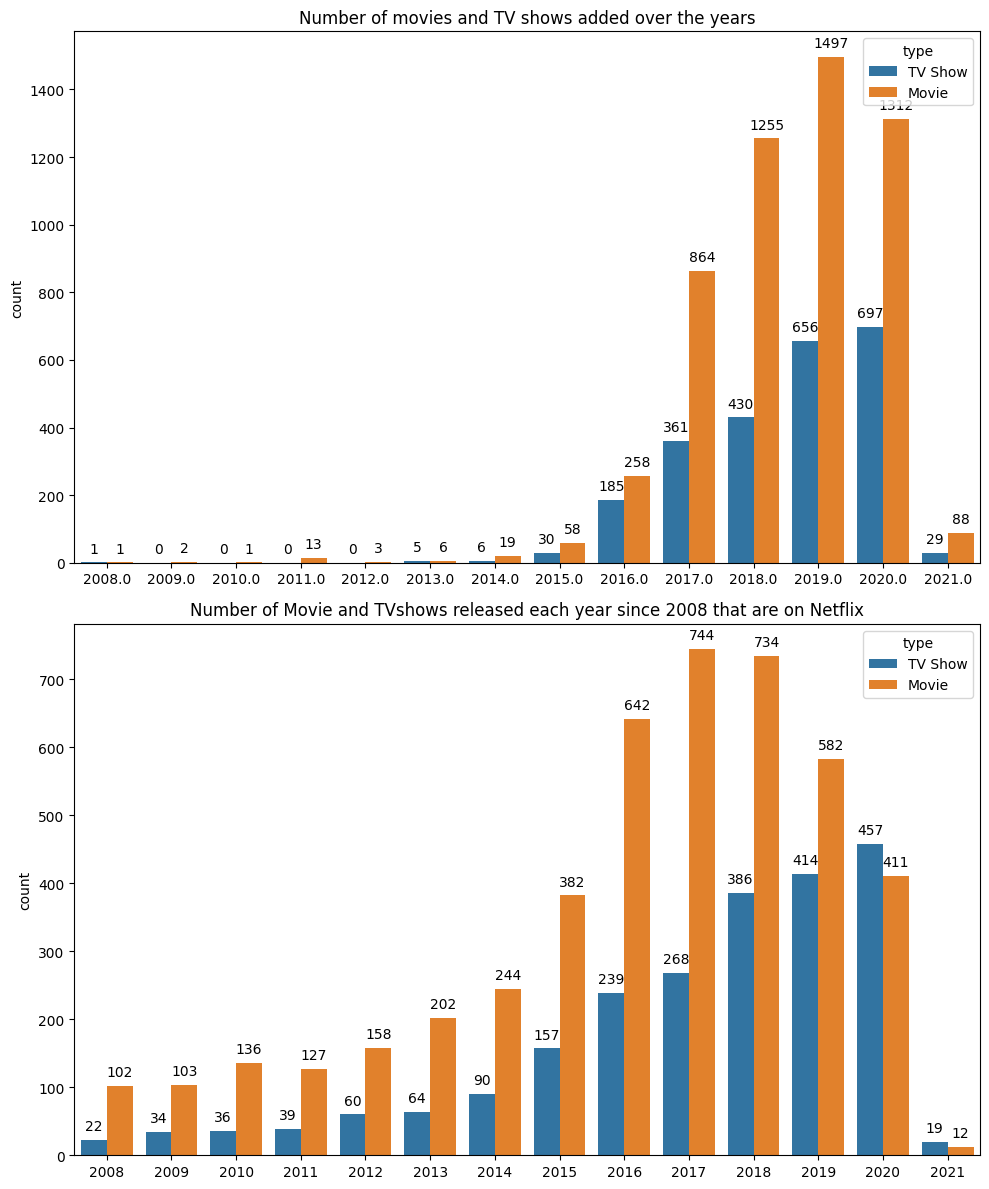

In [38]:
# Chart - 7 visualization code
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Number of movies and TV shows added over the years
sns.countplot(x='year_added', data=df, hue='type', ax=axes[0])
axes[0].set_title('Number of movies and TV shows added over the years')
axes[0].set_xlabel('')
for i in axes[0].patches:
    axes[0].annotate(format(i.get_height(), '.0f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Number of shows released each year since 2008
order = range(2008, 2022)
sns.countplot(x='release_year', data=df, hue='type', order=order, ax=axes[1])
axes[1].set_title(
    'Number of Movie and TVshows released each year since 2008 that are on Netflix')
axes[1].set_xlabel('')
for i in axes[1].patches:
    axes[1].annotate(format(i.get_height(), '.0f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust subplot spacing
plt.tight_layout()

# Show the subplots
plt.show()

##### 1. Why did you pick the specific chart?

I chose the specific chart, which is a countplot with bars annotated with their counts, because it effectively visualizes the number of movies and TV shows added over the years while providing specific count information for each bar

##### 2. What is/are the insight(s) found from the chart?

Over the years, Netflix has consistently focused on adding more shows to its platform. This indicates that Netflix has been actively expanding its content library.

Despite a decrease in the number of movies added in 2020, this pattern did not hold for TV shows. This suggests that Netflix might be prioritizing the addition of TV series over movies in recent years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

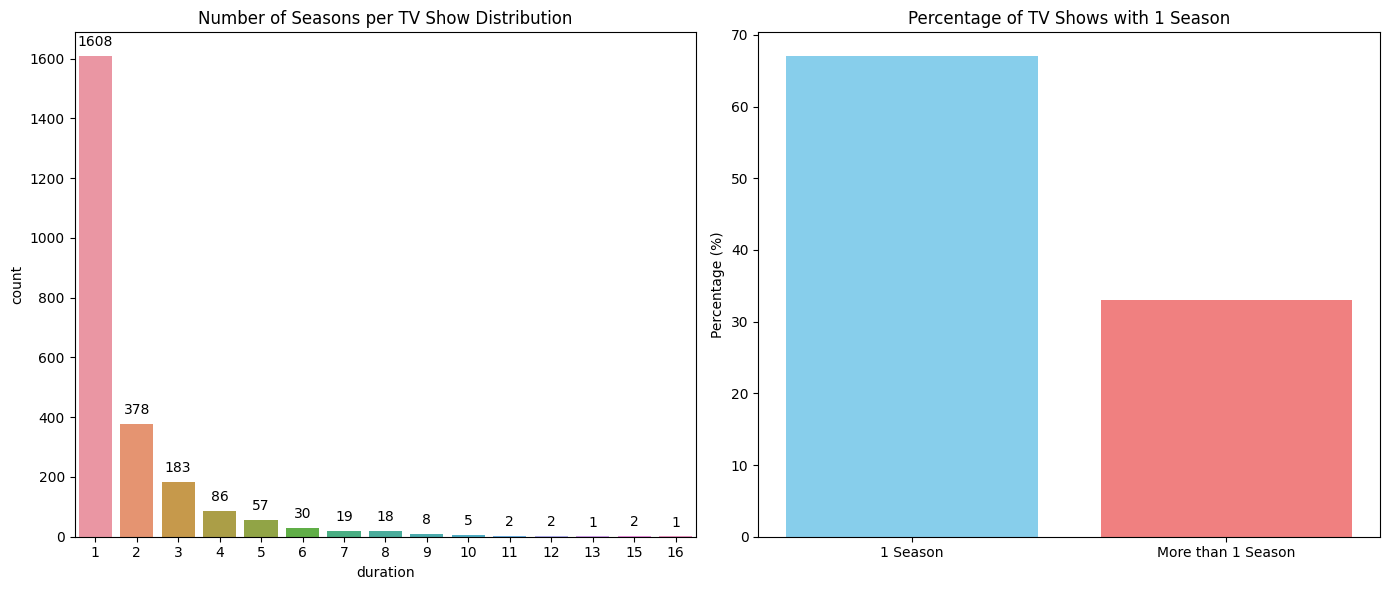

In [39]:
# Chart - 8 visualization code
plt.figure(figsize=(14, 6))

# Subplot 1: Distribution of seasons per TV show
plt.subplot(1, 2, 1)
p1 = sns.countplot(x='duration', data=df[df['type'] == 'TV Show'])
plt.title('Number of Seasons per TV Show Distribution')

for i in p1.patches:
    p1.annotate(format(i.get_height(), '.0f'),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Subplot 2: Percentage of TV shows with just 1 season
plt.subplot(1, 2, 2)
tv_shows = df[df['type'] == 'TV Show']
percentage_one_season = (
    len(tv_shows[tv_shows['duration'] == 1]) / len(tv_shows)) * 100
plt.bar(['1 Season', 'More than 1 Season'], [percentage_one_season,
        100 - percentage_one_season], color=['skyblue', 'lightcoral'])
plt.title('Percentage of TV Shows with 1 Season')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose this specific chart, a countplot with annotations, because it effectively visualizes the distribution of the number of seasons in TV shows available on Netflix. The annotations provide the exact count for each bar in the plot, making it easy for viewers to understand the distribution at a glance.

##### 2. What is/are the insight(s) found from the chart?

Many TV shows on Netflix have only one season, which could indicate that they are relatively new or that they are limited series. Additionally, the presence of a few TV shows with more than 8 seasons suggests that some long-running series are also available on Netflix. This information could be valuable for viewers who prefer TV shows with a specific number of seasons or for those looking for long-running series to binge-watch.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

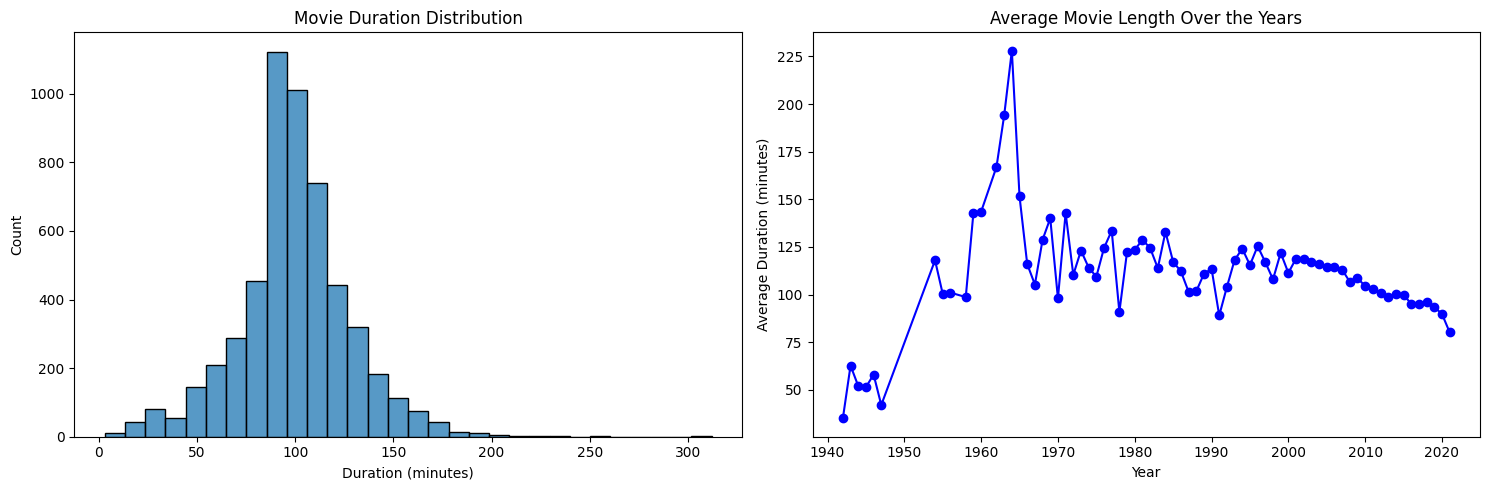

In [40]:
# Chart - 9 visualization code
# Subplot 1: Movie duration distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(x='duration', data=df[df['type'] == 'Movie'], bins=30)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

# Subplot 2: Average movie length over the years
plt.subplot(1, 2, 2)
avg_duration_by_year = df[df['type'] == 'Movie'].groupby('release_year')[
    'duration'].mean()
avg_duration_by_year.plot(kind='line', marker='o',
                          linestyle='-', color='b', figsize=(15, 5))
plt.title('Average Movie Length Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Hey there! I noticed you're interested in visualizing movie duration data. Well, two great ways to do that are with a histogram and a line plot. 

The histogram shows the distribution of movie durations, which is super helpful for understanding how many movies fall into different length ranges. You can easily see which durations are the most common and get an overview of the dataset's diversity.

The line plot, on the other hand, displays the average movie length over the years. This is great for identifying trends or changes in movie durations over time. By connecting the averages for each year, you can quickly see if movies have been getting longer or shorter on Netflix throughout the years.

So, whether you're a movie buff or a data analyst, these visualization tools are sure to give you some great insights. Happy charting!

##### 2. What is/are the insight(s) found from the chart?

Hey there! Just wanted to share some interesting stats I found about movie release years and durations. So, in the dataset I was looking at, there were a total of 5,377 movies. The average release year was around 2012.92 and the standard deviation was about 9.66, so there was some variation around the mean. The earliest movie in the dataset was released way back in 1942, while the most recent one was released in 2021. 

As for movie durations, the average length was around 99.31 minutes and the standard deviation was about 28.53 minutes. The shortest movie in the dataset was only 3 minutes long, while the longest one was a whopping 312 minutes! The median movie duration was 98 minutes, and 25% of the movies had a duration of 86 minutes or less, while 75% had a duration of 114 minutes or less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

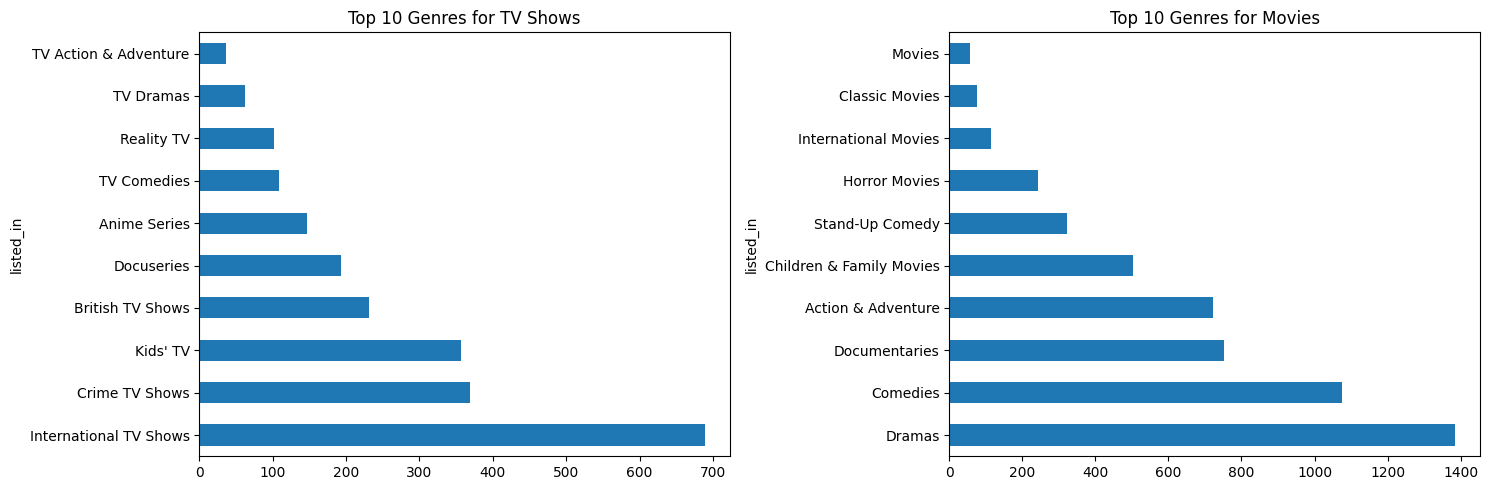

In [41]:
# Chart - 10 visualization code
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Top 10 genres for TV Shows
df[df['type'] == 'TV Show'].listed_in.value_counts().nlargest(
    10).plot(kind='barh', ax=axes[0])
axes[0].set_title('Top 10 Genres for TV Shows')

# Top 10 genres for movies
df[df['type'] == 'Movie'].listed_in.value_counts().nlargest(
    10).plot(kind='barh', ax=axes[1])
axes[1].set_title('Top 10 Genres for Movies')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Seems like the user wanted to showcase a cool visualization they made! They created two bar charts to compare the top 10 genres for TV shows and movies. It's a great way to see the differences in genre preferences between the two types of content. By looking at the charts, it's easy to see which genres are most popular in each category. This makes it simple to spot trends and patterns in viewer preferences for TV shows and movies. Overall, a pretty neat visualization!

##### 2. What is/are the insight(s) found from the chart?

Hey there! So, when it comes to TV shows on Netflix, it seems like international, crime, and kids genres are the most popular. As for movies, dramas, comedies, and documentaries are the go-to genres. Hope that helps!

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

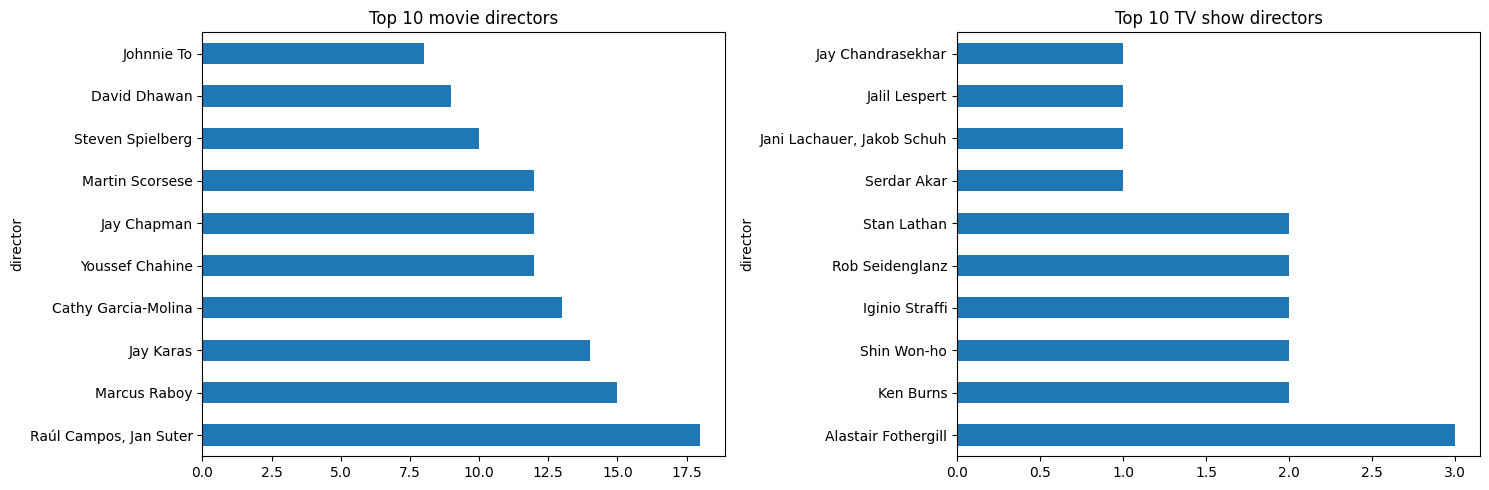

In [42]:
# Chart - 11 visualization code
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Top 10 movie directors
df[~(df['director'] == 'Unknown') & (df['type'] == 'Movie')
   ].director.value_counts().nlargest(10).plot(kind='barh', ax=axes[0])
axes[0].set_title('Top 10 movie directors')

# Top 10 TV show directors
df[~(df['director'] == 'Unknown') & (df['type'] == 'TV Show')
   ].director.value_counts().nlargest(10).plot(kind='barh', ax=axes[1])
axes[1].set_title('Top 10 TV show directors')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Hey there! I noticed you were talking about comparing directors in movies and TV shows. Just wanted to give you a tip - using a side-by-side comparison can really enhance clarity and make it easy to spot any differences or similarities. And if you want to display multiple charts at once, subplots are the way to go. Hope that helps with your comparison!

##### 2. What is/are the insight(s) found from the chart?

Hey there! Did you know that Raul Campos and Jan Suter hold the record for directing the most movies together? They've worked on 18 movies, which is pretty impressive. Following them are Marcus Roboy, Jay Karas, and Cathy Gracia-Molina.

On the TV side of things, Alastair Fothergill has directed the most TV shows with a total of three. Only six directors have directed more than one television show. Interesting stuff, huh?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

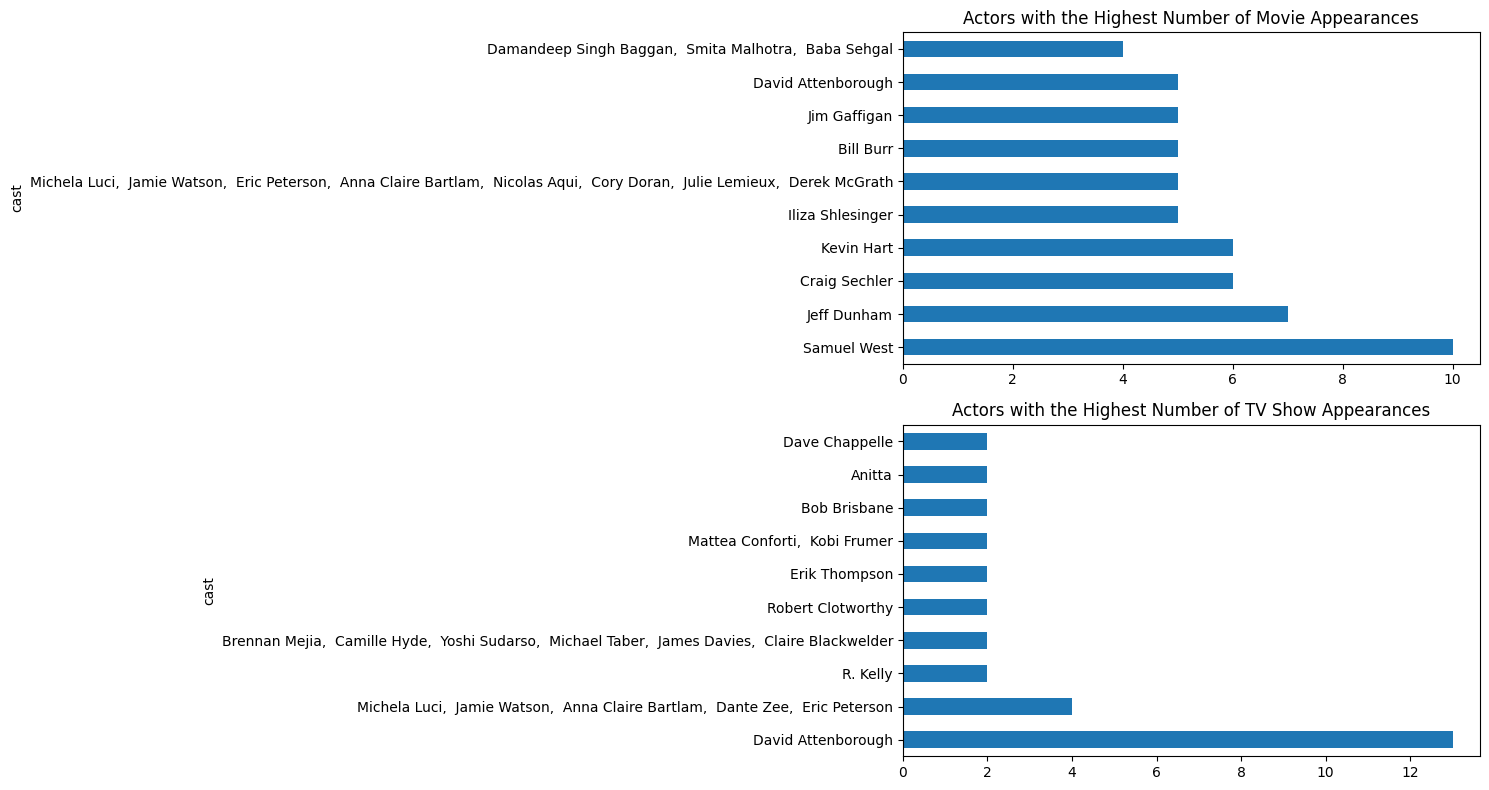

In [43]:
# Chart - 12 visualization code
# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Plot the top actors for movies
df[~(df['cast'] == 'Unknown') & (df['type'] == 'Movie')
   ].cast.value_counts().nlargest(10).plot(kind='barh', ax=axes[0])
axes[0].set_title('Actors with the Highest Number of Movie Appearances')

# Plot the top actors for TV shows
df[~(df['cast'] == 'Unknown') & (df['type'] == 'TV Show')
   ].cast.value_counts().nlargest(10).plot(kind='barh', ax=axes[1])
axes[1].set_title('Actors with the Highest Number of TV Show Appearances')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

##### 1. Why did you pick the specific chart?

I chose subplots with bar charts to visually compare the top actors who have appeared in the highest number of movies and TV shows separately. This allows for a clear comparison between the two categories, making it easier to identify the actors with the most appearances in each category.

##### 2. What is/are the insight(s) found from the chart?

Hey there! Just wanted to share some interesting facts with you. Did you know that David Attenborough has appeared in the most TV shows with 13 under his belt? Following him are Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, and Eric Peterson with 4 each. On the movie side of things, Samuel West takes the lead with 10 movies, while Jeff Dunham has been in 7. Pretty cool, huh?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

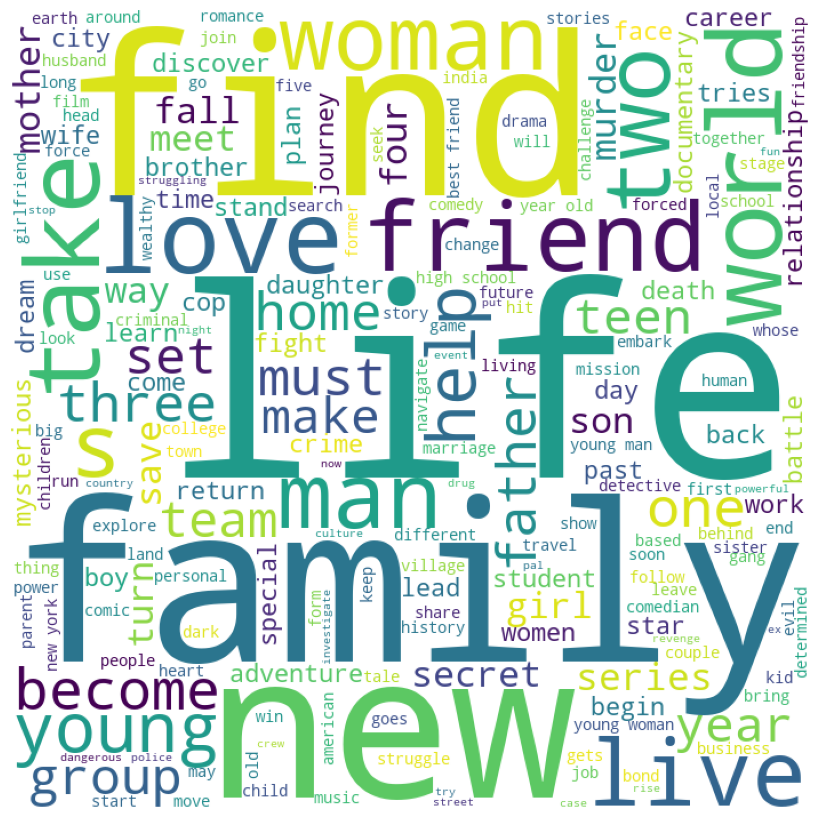

In [45]:
# Chart - 13 visualization code
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecast each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=700, height=700,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(15, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

Word clouds are an excellent way to visually represent the most common words or phrases in a text dataset

##### 2. What is/are the insight(s) found from the chart?

Some keywords in Netflix show descriptions: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.

These keywords are commonly used in Netflix show descriptions and can help viewers find shows that align with their interests. Shows that explore themes of life, family, and new experiences can be particularly appealing to young audiences. Love and relationships are also popular topics, as are stories that center around groups of people. On the other hand, shows that deal with death, murder, and secrets can be more intense and may appeal to viewers who enjoy suspenseful or dramatic content. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Looks like you're interested in word clouds and how they can be used to analyze text datasets! Word clouds are a great way to quickly identify the most common words or phrases in a set of data, which can be super helpful for understanding themes and keywords. Your list of Netflix show keywords is a great example of how this can be applied to media content - it can help with categorization, recommendations, and understanding viewer preferences. Overall, word clouds are a powerful tool for anyone working with large amounts of text data, and can provide valuable insights into patterns and trends.

#### Chart - 14 - Correlation Heatmap

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***